# Homecourt Advantage in the NBA (2022-2023 Season)

In this notebook I will:
- Create a dataframe of teams' home/road games using the NBA api
- Use the data to test the significance of the homecourt advantage (t-test)
- Create visualisations that illustrate the difference between the road win rate % and home win rate % distributions
- Examine causes of this phenomenon, citing research papers



## Introduction

I'm sure we have all heard of the phenomenon of the Homecourt Advantage where home teams play better than away teams. This has historically been the trend in the NBA. 

In the context of sportsbetting, I am still baffled by the fact that in the 2022 finals series, despite GSW having won two of its last games against BOS, leading the series 3-2, they were still the [underdogs](https://www.oddsportal.com/basketball/usa/nba-2021-2022/results/) going (GSW H to H Odds @ 2.45) into Game 6 in the betting markets. One big reason could be the fact that Game 6 was played in Boston. Nevertheless, I made money betting on GSW in that game, effectively taking advantage of the overly priced "away game premium". But was that luck or was it actually mispriced?

In this Jupyter Notebook, I seek to investigate the magnitude of the effects of the Homecourt advantage in the NBA this season. I hope this would yield insights into this phenomenon and help me make better bets going forward.

I will begin by creating a dataframe that shows the home win and road win ratios of each of the 30 NBA teams.

In [87]:
# Importing the NBA API
from nba_api.stats.endpoints import teamgamelog
# Importing pandas as pd
import pandas as pd

# fetching teams data
from nba_api.stats.static import teams
# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = teams.get_teams()

team_list = []
road_wins = []
home_wins = []
road_ratio = []
home_ratio = []

try:
    for team in nba_teams:

        BGL = teamgamelog.TeamGameLog(team['id'], season = '2022-23')

        dataframe = BGL.team_game_log.get_data_frame()

        # is there a better way to iterate over two columns?
        match_up = list(dataframe['MATCHUP'].values)
        WL = list(dataframe['WL'].values)
        
        # count the wins when they are at home
        home_games_count = 0
        road_win_count = 0
        home_win_count = 0
        for i in range(len(WL)):
            if 'vs' in match_up[i]:
                home_games_count += 1
                if 'W' == WL[i]:
                    #print(match_up[i])
                    home_win_count += 1
            else:
                if 'W' == WL[i]:
                    road_win_count += 1
      
        
#         print(f" Total road wins: {road_win_count}")
#         print(f" Total home wins: {home_win_count}")

#         print(f" {team['nickname']} home win ratio is {round(home_win_count / home_games_count,3)}")
#         print(f" {team['nickname']} road win ratio is {round(road_win_count / (len(WL) - home_games_count), 3)} \n")

        
        team_list.append(team['nickname'])
        road_wins.append(road_win_count)
        home_wins.append(home_win_count)
        road_ratio.append(round(road_win_count / (len(WL) - home_games_count), 3))
        home_ratio.append(round(home_win_count / home_games_count, 3))


    home_vs_road = pd.DataFrame({"Teams": team_list, "Road Wins": road_wins, "Home Wins": home_wins, "Road Win Rate": road_ratio, "Home Win Rate": home_ratio})
    home_vs_road

except:
    home_vs_road = pd.DataFrame({"Teams": team_list, "Road Wins": road_wins, "Home Wins": home_wins, "Road Win Rate": road_ratio, "Home Win Rate": home_ratio}, index = "Teams")
    print(home_vs_road)

In [92]:
home_vs_road['Win Rate Difference'] = home_vs_road['Home Win Rate'] - home_vs_road['Road Win Rate']

In [97]:
home_vs_road = home_vs_road.sort_values(by = ["Win Rate Difference"])
home_vs_road

,Teams,Road Wins,Home Wins,Road Win Rate,Home Win Rate,Win Rate Difference
15,Knicks,12,10,0.600,0.455,-0.145
29,Hornets,6,5,0.261,0.263,0.002
28,Pistons,6,5,0.240,0.250,0.010
21,Kings,9,12,0.500,0.571,0.071
1,Celtics,13,16,0.650,0.727,0.077
14,Nets,14,13,0.636,0.722,0.086
11,Heat,10,12,0.476,0.571,0.095
8,Rockets,4,6,0.200,0.300,0.100
22,Spurs,5,8,0.263,0.364,0.101
9,Clippers,10,12,0.455,0.571,0.116


Just by looking at the number of road wins vs home wins, we can see that the home court advantage is quite powerful in the NBA this season. Out of the 28 teams that have won more than 11 games, only 3 (Nets, Knicks, Blazers) have more wins on the road than at home (as of 12 Jan 2023). Furthermore, out of 30 teams, only the Knicks does better in road games. 

We can see that while teams like Kings, Celtics, and Nets do not perform too differently in road games vs home games, teams such as Warriors, Cavs, Mavs, perform significantly worse in road games.

Now we have seen this phenomenon intuitively, let's test this difference statistically.

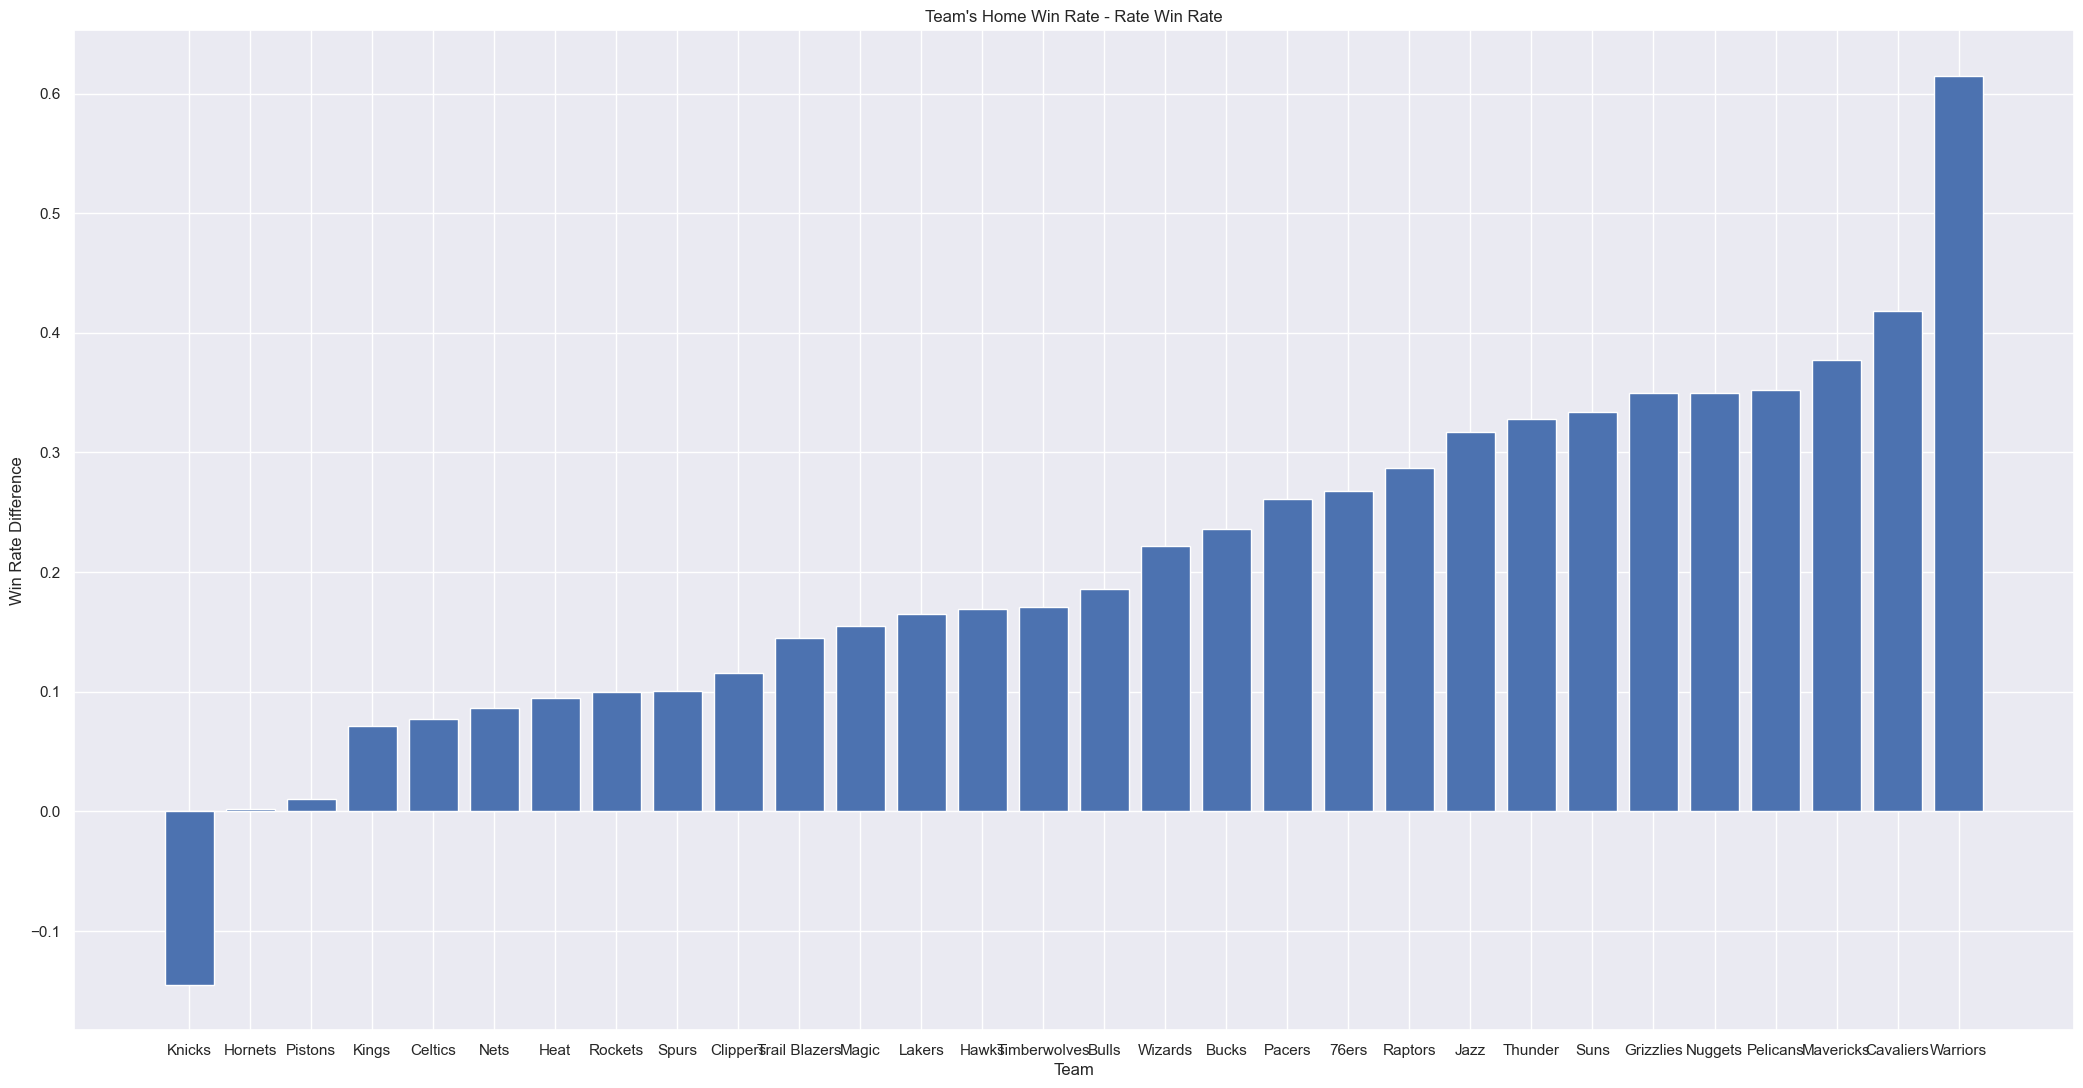

In [107]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(home_vs_road['Teams'], home_vs_road["Win Rate Difference"])
plt.xlabel('Team')
plt.ylabel('Win Rate Difference')
plt.title("Team's Home Win Rate - Rate Win Rate")

plt.show()

## Two-Sample t-test: Test the alternative hypothesis that the means of winning percentages  in home games are greater than those in road games

### T-test Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
- Observations across each sample are paired.

<b>Null Hypothesis</b>: true mean of road win ratio = true mean of home win ratio <br/> <b>Alternative Hypothesis</b>: true mean of road win ratio < true mean of home win ratio

In [62]:
# Student's t-test to test the distributions of wins and loss ratios
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

# Present the average win ratios
print(f"The average win ratio of home games across the league is {round(sum(home_ratio) / len(home_ratio), 3)}")
print(f"The average win ratio of road games across the league is {round(sum(road_ratio) / len(road_ratio), 3)}\n")

# conduct the t-test
print("T-test Results")
stat, p = ttest_ind(road_ratio, home_ratio, alternative='less')
print('stat=%.3f, p=%.3f \n' % (stat, p))

if p > 0.05:
	print('The two distributions are not significantly statistically different.')
else:
	print('At the 5% confidence level, the true mean of road win ratio is statistically smaller than the true mean of home win ratio')

The average win ratio of home games across the league is 0.604
The average win ratio of road games across the league is 0.393

T-test Results
stat=-5.594, p=0.000 

At the 5% confidence level, the true mean of road win ratio is statistically smaller than the true mean of home win ratio


Text(0.5, 1.0, 'NBA Team Road vs Home Game Winning Probability')

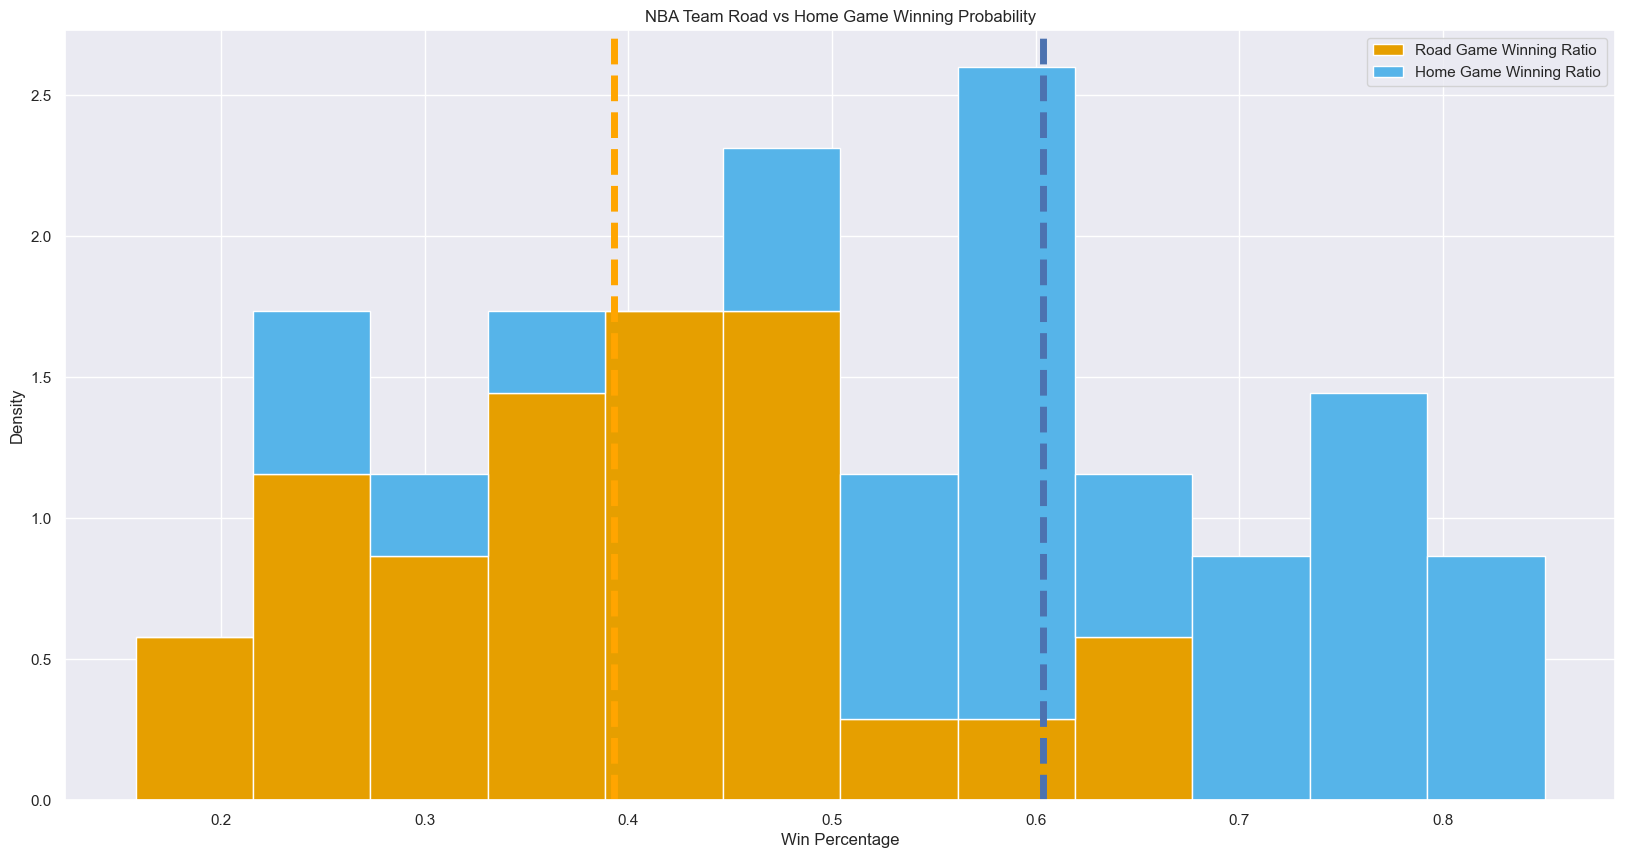

In [86]:
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['Road Game Winning Ratio', 'Home Game Winning Ratio']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([road_ratio, home_ratio], bins = int(180/15), color = colors, label = names, density = True, stacked = True)

plt.axvline(np.mean(road_ratio), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(home_ratio), color='b', linestyle='dashed', linewidth=5)

# Plot formatting
plt.legend()
plt.xlabel('Win Percentage')
plt.ylabel('Density')
plt.title('NBA Team Road vs Home Game Winning Probability')

In [63]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [67]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=6)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

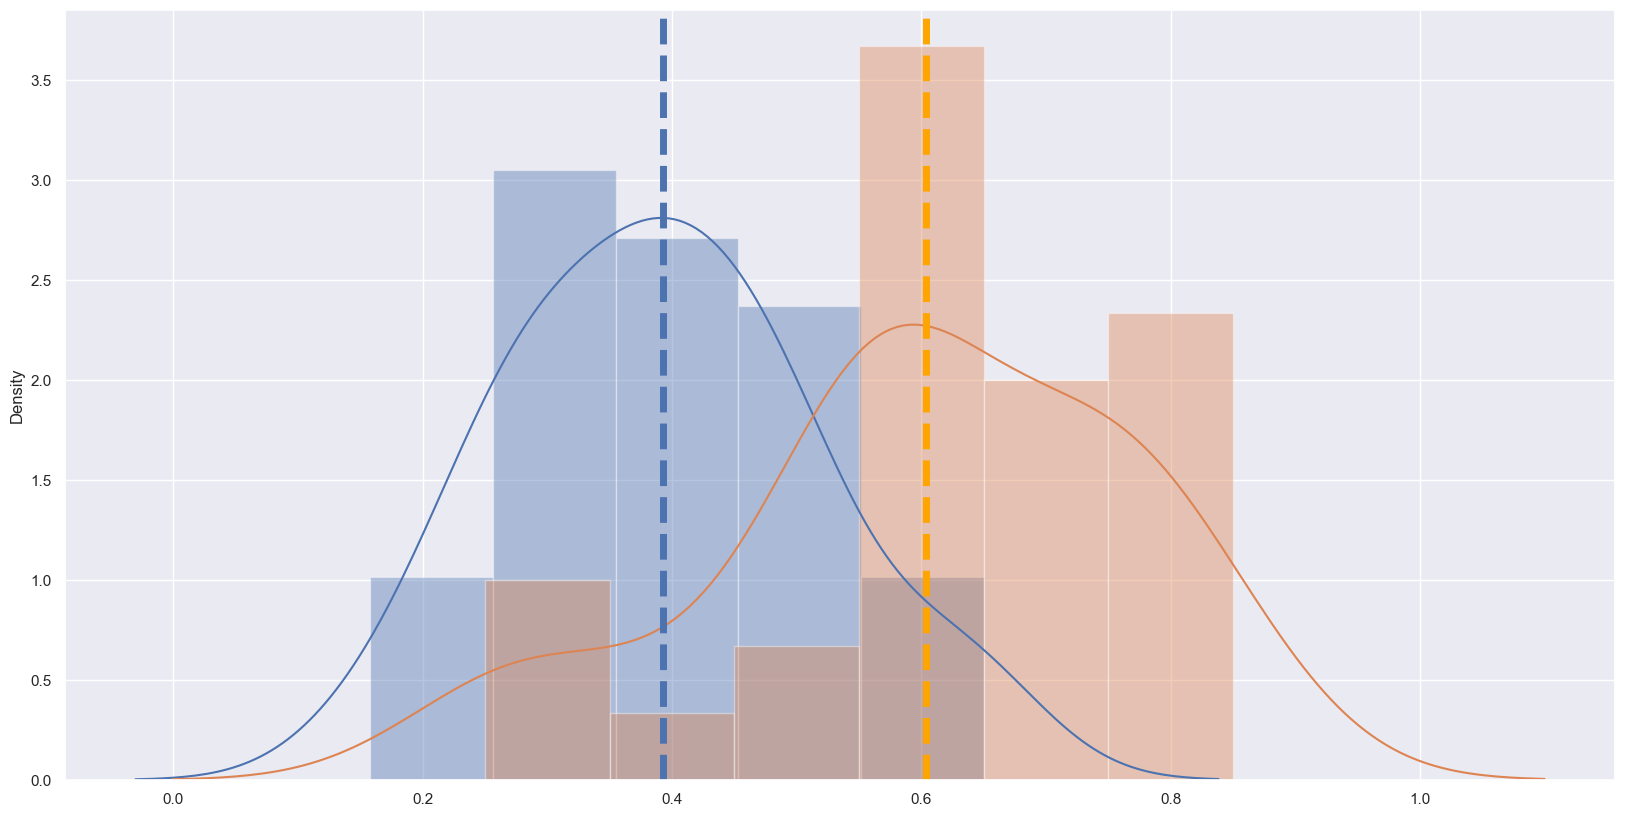

In [81]:
plt.figure()
ax1 = sns.distplot(road_ratio)
ax2 = sns.distplot(home_ratio)


We can see from the graphs above that the distribution of NBA teams' home winning percentage is significantly greater than NBA teams' road winning percentage. Now let's examine some potential causes of homecourt advantage.

## Some Causes of Homecourt Advantage
- [<b>Lack of Rest</b>](https://repository.upenn.edu/cgi/viewcontent.cgi?article=1157&context=statistics_papers)      Research from this paper indicates that lack of rest for the road team, while not a dominant factor, is an important contributor to the home court advantage in the NBA.
- [<b>Crowd Effect</b>](https://journals.sagepub.com/doi/pdf/10.1177/1527002515595842)   Crowd effects are sizable in motivating a home team win, raising the likelihood of such an event by between an estimated 21 and 22.8 percentage points

- [<b>Biased Referees</b>](https://web.archive.org/web/20031205194120id_/http://homepage.uibk.ac.at:80/~c40433/favoritism_rev.pdf) Sutter and Kocher (2004) find that referees are, on average, partial to the home team in making discretionary decisions.